In [1]:
import mwdsbe
import schuylkill as skool
import pandas as pd
import time

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

## Functions

In [3]:
def drop_duplicates_by_date(df, date_column):
    df.sort_values(by=date_column, ascending=False, inplace=True)
    df = df.loc[~df.index.duplicated(keep="first")]
    df.sort_index(inplace=True)
    return df

## Data

In [4]:
registry = mwdsbe.load_registry() # geopandas df

In [5]:
payments = pd.read_csv(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe\mwdsbe\data\Payments\city_payments_detailed_2017.csv')

In [6]:
len(payments)

238894

##### Clean Data

In [7]:
ignore_words = ['inc', 'group', 'llc', 'corp', 'pc', 'incorporated', 'ltd', 'co', 'associates', 'services', 'company', 'enterprises', 'enterprise', 'service', 'corporation']
cleaned_registry = skool.clean_strings(registry, ['company_name', 'dba_name'], True, ignore_words)
cleaned_payments = skool.clean_strings(payments, ['vendor_name'], True, ignore_words)

cleaned_registry = cleaned_registry.dropna(subset=['company_name'])
cleaned_payments = cleaned_payments.dropna(subset=['vendor_name'])

In [8]:
cleaned_registry

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,mailing_state,mailing_zip,certification_type,capability,local,out_of_state,location_standard,lat,lng,geometry
registry_id,,,,,,,,,,,,,,,,,,,,
0,119 degrees architects,NaN,Rafael,Utrera,"1503 Green Street, Suite # 4",Philadelphia,PA,19130.0,"1503 Green Street, Suite # 4",Philadelphia,PA,19130.0,MBE,"NAICS 5413 Architectural, Engineering, and Rel...",True,False,1503 GREEN ST,39.964275,-75.163042,POINT (-75.16304 39.96427)
1,12bravo,NaN,JEFFREY,YEKENCHIK,236 McKendimen Road,Medford Lakes,NJ,8055.0,236 McKendimen Road,Medford Lakes,NJ,8055.0,DSBE,"Addition, alteration and renovation for-sale b...",False,True,NaN,NaN,NaN,None
2,1st choice financial,provisio,Kathrina,Nease,133 N. 21st Street,Camp Hill,PA,17011.0,133 N. 21st Street,Camp Hill,PA,17011.0,WBE,NAICS 928120 International Affairs,False,False,NaN,NaN,NaN,None
3,212 harakawa,two twelve,Ann,Harakawa,"236 W 27th Street, Suite 802",New York,NY,10001.0,"236 W 27th Street, Suite 802",New York,NY,10001.0,MWBE,Graphic Design Services; Graphic design servic...,False,True,NaN,NaN,NaN,None
4,215 media solutions,NaN,Dewain,Johnson,810 Felton Avenue,Sharon Hill,PA,19079.0,810 Felton Avenue,Sharon Hill,PA,19079.0,MBE,NAICS 5414 Specialized Design Services ; NAICS...,False,False,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,zoeza,NaN,Jason,Wingard,"536 W. Moreland Avenue, Suite C.",Philadelphia,PA,19118.0,"536 W. Moreland Avenue, Suite C.",Philadelphia,PA,19118.0,MBE,90124\tResearch Consulting; 90113\tTraining Co...,True,False,536 W MORELAND AVE,40.059613,-75.207085,POINT (-75.20708 40.05961)
3115,zones,NaN,Mr.,Lalji,1102 15TH ST SW,Auburn,WA,98001.0,1102 15TH ST SW,Auburn,WA,98001.0,MBE,42710\tCOMPUTER EQUIPMENT & PERIPHERALS- NEW;,False,True,NaN,NaN,NaN,None
3116,zook motors,NaN,Susan,Wilson,25 Willow Run Drive,Kane,PA,16735.0,25 Willow Run Drive,Kane,PA,16735.0,WBE,26005\tTIRE CHANGING & REPAIRS; 25074\tTOWING ...,False,False,NaN,NaN,NaN,None


In [9]:
cleaned_payments

,sub_obj,fy,check_date,document_no,dept,department_title,char_,character_title,fm,sub_obj_title,vendor_name,doc_ref_no_prefix,doc_ref_no_prefix_definition,contract_number,contract_description,transaction_amount
0,231,2017,2017-04-12,CHEK17119771,42,42 COMMERCE,2,02 PURCHASE OF SERVICES,10,OVERTIME MEALS 0231,eat at joe s,PVXX,payment voucher,NaN,NaN,66.82
1,211,2017,2017-06-09,ACHD17177233,26,26 LICENSES & INSPECTIONS,2,02 PURCHASE OF SERVICES,12,TRANSPORTATION 0211,l i â travel imprest fund,PVXX,payment voucher,NaN,NaN,127.33
2,258,2017,2016-11-25,CHEK17063736,44,44 LAW,2,02 PURCHASE OF SERVICES,5,COURT REPORTERS 0258,marlene bell reporting,PVXX,payment voucher,NaN,NaN,454.20
3,260,2017,2016-07-07,CHEK17000247,11,11 POLICE,2,02 PURCHASE OF SERVICES,1,REPAIR AND MAINTENANCE CHARGES 0260,ricoh americas,VCXX,procurement,NaN,NaN,50.00
4,313,2017,2016-07-08,ACHD17000233,23,23 PRISONS,3,03 MATERIALS AND SUPPLIES,1,FOOD 0313,philadelphia prisons,PCXX,petty cash,NaN,NaN,71.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238889,254,2017,2017-03-31,CHEK17113438,15,15 OFFICE OF BH/MR SERVICES,2,02 PURCHASE OF SERVICES,9,BEHAVORIAL HEALTH AND INTELLECTUAL DISABILITIE...,do what you re built for,PVMD,professional services,1720630,Trauma Education Program,52901.00
238890,254,2017,2017-03-31,CHEK17113486,15,15 OFFICE OF BH/MR SERVICES,2,02 PURCHASE OF SERVICES,9,BEHAVORIAL HEALTH AND INTELLECTUAL DISABILITIE...,sage communications partners,PVMD,professional services,1720126,Communication Firm,6675.00
238891,254,2017,2017-03-31,CHEK17114422,15,15 OFFICE OF BH/MR SERVICES,2,02 PURCHASE OF SERVICES,9,BEHAVORIAL HEALTH AND INTELLECTUAL DISABILITIE...,epic developmental,PVMD,professional services,1720327,EIP FFS Unitary,1111.60
238892,254,2017,2017-03-31,CHEK17114423,15,15 OFFICE OF BH/MR SERVICES,2,02 PURCHASE OF SERVICES,9,BEHAVORIAL HEALTH AND INTELLECTUAL DISABILITIE...,epic developmental,PVMD,professional services,1720327,EIP FFS Unitary,28295.13


## 1. All Business
### a) Total Transaction Amount by Vendor Name -Top 10

In [10]:
# Total transaction amount by vendor name
transactions_by_vendors = payments.groupby('vendor_name')['transaction_amount'].sum().to_frame('dollar_amount').reset_index()

In [11]:
transactions_by_vendors.sort_values(by='dollar_amount', ascending=False, inplace=True)

##### There are 5506 unique vendors

In [12]:
top10 = transactions_by_vendors[:10]

In [13]:
sns.set(style="whitegrid")

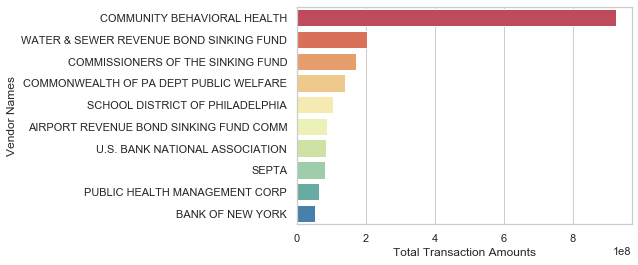

In [14]:
ax = sns.barplot(x="dollar_amount", y="vendor_name", data=top10, palette='Spectral')
ax.set(xlabel='Total Transaction Amounts', ylabel='Vendor Names')
plt.show()

### b) Total Transaction Amount by Departments - Top 20

In [57]:
transactions_by_dept = payments.groupby('department_title')['transaction_amount'].sum().to_frame('dollar_amount').reset_index()

In [58]:
transactions_by_dept.sort_values(by='dollar_amount', ascending=False, inplace=True)

In [59]:
top10 = transactions_by_dept[:10]

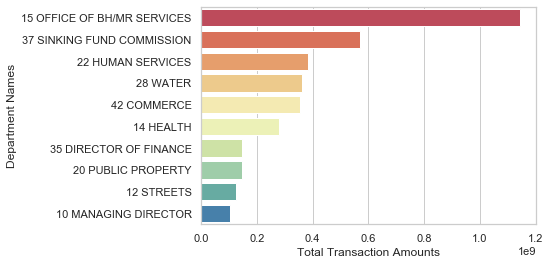

In [60]:
ax = sns.barplot(x="dollar_amount", y="department_title", data=top10, palette='Spectral')
ax.set(xlabel='Total Transaction Amounts', ylabel='Department Names')
plt.show()

## 2. MWDSBE - Minority Business

### a) Merge Full Registry and Payments only with TF-IDF 85

In [158]:
# t1 = time.time()
# merged = (
#     skool.tf_idf_merge(cleaned_registry, cleaned_payments, left_on="company_name", right_on="vendor_name", score_cutoff=85)
#     .pipe(skool.tf_idf_merge, cleaned_registry, cleaned_payments, left_on="dba_name", right_on="vendor_name", score_cutoff=85)
# )
# t = time.time() - t1

In [159]:
# print('Execution time:', t, 'sec')

Execution time: 190.28902673721313 sec


In [160]:
# len(merged)

3278

#### Check duplicates

In [161]:
# len(merged.index.drop_duplicates()) # 159 duplicates

3119

In [162]:
# duplicates = merged.loc[merged.index.duplicated(keep=False)] # see all duplicates

In [164]:
# len(duplicates) # 159 * 2 = 318

318

#### Keep duplicates since same vendors have multiple payments by the city

In [165]:
# matched = merged.dropna(subset=['vendor_name'])

In [166]:
# print('Matched:', len(matched), 'out of', len(cleaned_registry)) # 3 wrong matches

Matched: 369 out of 3119


In [168]:
# matched.to_excel (r'C:\Users\dabinlee\Desktop\mwdsbe\data\payments\tf-idf-85.xlsx', header=True)

In [15]:
matched_payments = pd.read_excel(r'C:\Users\dabinlee\Desktop\mwdsbe\data\payments\tf-idf-85.xlsx')

In [16]:
matched_payments.rename(columns={'Unnamed: 0': 'left_index'}, inplace=True)
matched_payments.set_index('left_index', inplace=True)

In [47]:
len(matched_payments)

369

#### Investigate Newly Matched Companies from Payments Data
Compare with matched companies from Open Data Philly License(OL) data

In [17]:
matched_OL = pd.read_excel(r'C:\Users\dabinlee\Desktop\mwdsbe\data\license-opendataphilly\tf-idf\tf-idf-85.xlsx')
matched_OL = matched_OL.set_index('left_index')

In [18]:
len(matched_OL)

1642

In [19]:
matched_OL = drop_duplicates_by_date(matched_OL, "issue_date") # without duplicates

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
len(matched_OL)

1502

In [21]:
new_matches = matched_payments.index.difference(matched_OL.index).tolist()

In [22]:
len(new_matches) # newly found matches by payments

61

#### full_matched_OL: Matched companies with Open Data Philly License(OL) data using TF-IDF score 0
to see why 61 companies did not show up with OL matching

In [23]:
full_matched_OL = pd.read_excel(r'C:\Users\dabinlee\Desktop\mwdsbe\data\tf-idf0.xlsx')

In [24]:
full_matched_OL.rename(columns={'Unnamed: 0': 'left_index'}, inplace=True)
full_matched_OL.set_index('left_index', inplace=True)

In [25]:
len(full_matched_OL)

3025

In [26]:
missed_matches_OL = full_matched_OL.loc[new_matches]

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [27]:
found_matches_payments = matched_payments.loc[new_matches]

In [28]:
new_matches_OL_payments = missed_matches_OL.merge(found_matches_payments, left_index=True, right_index=True)

In [29]:
simple_difference_OL_payment = new_matches_OL_payments[['company_name_x', 'dba_name_x', 'match_probability_x', 'company_name_y', 'vendor_name', 'match_probability_y', 'transaction_amount']]

In [30]:
simple_difference_OL_payment

,company_name_x,dba_name_x,match_probability_x,company_name_y,vendor_name,match_probability_y,transaction_amount
left_index,,,,,,,
19,a a glove safety,NaN,0.717242,magid glove safety,a a glove safety,1.0,380.00
19,a a glove safety,NaN,0.717242,magid glove safety,a a glove safety,1.0,440.00
65,acclaim systems,NaN,0.568845,l m systems,acclaim systems,1.0,3878.35
65,acclaim systems,NaN,0.568845,l m systems,acclaim systems,1.0,46539.96
176,alternative micrographics,NaN,0.777362,the micrographics,alternative micrographics,1.0,306.00
...,...,...,...,...,...,...,...
2992,veritiv operating,NaN,0.549860,verio operating,veritiv operating,1.0,229.50
3013,visual sound,NaN,0.697870,visual solutions,visual sound,1.0,1298.00
3013,visual sound,NaN,0.697870,visual solutions,visual sound,1.0,81.00


In [31]:
# simple_difference_OL_payment.to_excel (r'C:\Users\dabinlee\Desktop\mwdsbe\data\payments\difference_OL_payments.xlsx', header=True)

### b) The Number of MWDSBE working with the City
If a company  have a payment history, then it means that the company works with the City.

In [32]:
unique_companies = matched_payments.company_name.unique()

In [33]:
len(unique_companies)

210

### c) Get all payments based on unique vendor names
Current matched_payment data only contains 1-2 payments

In [34]:
unique_vendors = matched_payments.vendor_name.unique()

In [35]:
len(unique_vendors)

207

In [36]:
all_payments = cleaned_payments.loc[cleaned_payments['vendor_name'].isin(unique_vendors)]

In [37]:
len(all_payments)

9613

### d) Total Transaction Amount by Vendors - Top 20

In [48]:
total_transaction_per_vendor = all_payments.groupby(['vendor_name'])['transaction_amount'].sum().to_frame('dollar_amount').reset_index() # how to keep original index?

In [49]:
total_transaction_per_vendor.sort_values(by='dollar_amount', ascending=False, inplace=True)

In [50]:
top10 = total_transaction_per_vendor[:10]

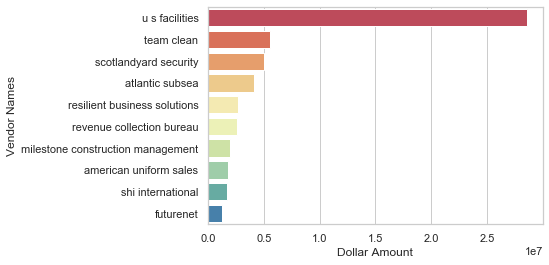

In [51]:
ax = sns.barplot(x="dollar_amount", y="vendor_name", data=top10, palette='Spectral')
ax.set(xlabel='Dollar Amount', ylabel='Vendor Names')
plt.show()

### e) Total Transaction Amount by Departments - Top 20

In [52]:
departments = all_payments.groupby('department_title')['transaction_amount'].sum().to_frame('dollar_amount').reset_index()

In [53]:
departments.sort_values(by='dollar_amount', ascending=False, inplace=True)

In [54]:
mb_dept_10 = departments[:10]

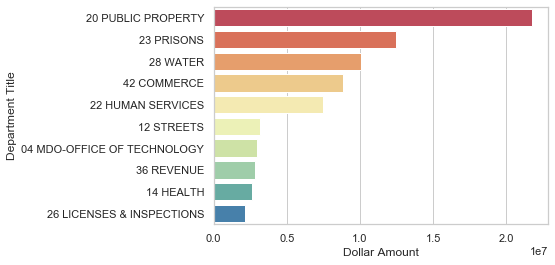

In [55]:
ax = sns.barplot(x="dollar_amount", y="department_title", data=mb_dept_10, palette='Spectral')
ax.set(xlabel='Dollar Amount', ylabel='Department Title')
plt.show()

### f) Normalized Transaction Amount of the minority business by departments
How much does each department spend their payments to minority business?

In [61]:
# merge departments with high payments in minority businesses and all transactions by departments
merged_dept = departments.merge(transactions_by_dept, how='left', on='department_title')

* dollar_amount_x = total transaction amount of minority business
* dollar_amount_y = total transaction amount of all business

In [62]:
merged_dept['normalized_amount'] = merged_dept['dollar_amount_x'] / merged_dept['dollar_amount_y']

In [65]:
merged_dept.sort_values(by='normalized_amount', ascending=False)[:10]

,department_title,dollar_amount_x,dollar_amount_y,normalized_amount
33,30 ZONING BOARD,22168.73,2.216873e+04,1.000000
39,27 BOARD OF LICENSES & INSPECTIONS,9377.71,9.377710e+03,1.000000
34,63 BOARD OF REVISION OF TAXES,18233.46,6.008468e+04,0.303463
18,31 RECORDS,450192.21,1.935737e+06,0.232569
37,54 COMMISSION ON HUMAN RELATIONS,13304.40,6.272217e+04,0.212116
9,26 LICENSES & INSPECTIONS,2139198.04,1.149407e+07,0.186113
0,20 PUBLIC PROPERTY,21789145.90,1.475318e+08,0.147691
26,61 CITY CONTROLLER,55993.77,4.219127e+05,0.132714
1,23 PRISONS,12439553.07,1.041799e+08,0.119405
22,01 CITY COUNCIL,221994.07,2.009822e+06,0.110455


### g) Finanacial Year (fy) trends
In which financial year was the payment made the most? => data only contains 2017 fy data!!

In [ ]:
all_payments.groupby('fy').size().to_frame('N').reset_index() # every payments in matched data made in 2017 fy

In [ ]:
cleaned_payments.groupby('fy').size().to_frame('N').reset_index() # only 2017 fy